# Decision Tree
- root node부터 시작
- 각 node의 질문에 따라 branch를 타고 내려감
- 최종 leaf node에 도달하여 예측값을 얻는 과정

##### 클래스 확률 추정:
- 특정 데이터가 각 클래스에 속할 확률을 어떻게 계산하는지 설명
##### 규제 하이퍼 파라미터:
- 훈련 데이터에 너무 과하게 맞춰지는 **과적합(Overfiting) 방지**하기 위한 파라미터 조정

##### 회귀:
- 특정 수치를 예측하는 회귀 문제에 적용 가능 -> 불순도 대신 MSE 사용
- 불안정성, 작은 변화에도 민감하게 반응하여 트리구조가 완전히 달라질 수 있음. => _**랜덤포레스트**_

## 지니 불순도(Gini Impurity)
- 한 그룹(노드) 내의 데이터가 얼마나 섞여 있는지를 나타내는 지표
- 노드에 포함된 샘플들이 한 클래스에 속할수록(=불순도가 낮을수록) 좋음
- 값의 범위: **0 ~ 0.5 (이진 분류)**
    - 0: 완전순수, 모든 샘플이 하나의 클래스
    - 0.5: 두 클래스가 정확히 50:50
- CART 알고리즘에 기본값으로 사용

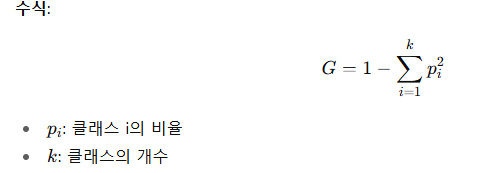

## 지니계수(Gini Index)
- 지니불순도를 기반으로 한 **트리 전체**의 불순도 측정 지표
- 트리의 각 노드 불순도에 그 노드의 샘플 비율을 곱해 가중평균으로 계산
- 값이 작을수록 전체 트리가 더 순수하게 분할

![](2025-10-15-12-46-03.png)

## 엔트로피 (Entropy)
- 데이터의 **불확실성(uncertainty)**을 측정하는 지표

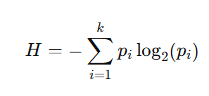

- 0 ~ 1 (이진 분류)
    - 0: 완전 순수 (한 클래스만 존재)
    - 1: 완전 혼합 (50:50)
- **Information Gain (정보이득)**

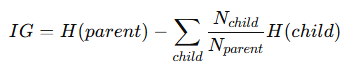

## CART 알고리즘 (Classification And Regression Tree)
- 결정트리 학습 알고리즘 중 가장 대표적인 방법
    - 분류: 지니불순도(Gini Impurity) 사용
    - 회귀: 평균제곱오차(MSE) 사용
- 각 노드에서 가능한 모든 분할(feature, threshold)을 탐색한 뒤, 불순도를 가장 크게 감소시키는 분할을 선택
- 가지치기(pruning)를 통해 과적합(overfitting) 방지

In [ ]:
# 노드에 50개의 데이터가 붓꽃 A 40 B 10
    # A의 비율 (Pa) = 40 / 50 = 0.8
    # B의 비율 (Pb) = 10 / 50 = 0.2
    # 지니불순도 1 - (0.8^2 + 0.2^2) = 0.64+0.04 = 0.68   1-0.68 = 0.32

In [ ]:
# 결정트리 CART알고리즘
    # 1. 모든 가능한 질문 생성 : 하나의 특성(ex 꽃잎의길이) 가능한 모든 임계값(ex 2.25cm 1.5cm) 조합해서 질문
    # 2. 불순도 감소량 계산 : 각 질문으로 데이터를 두개로 나눌때 분할전 부모노드의 불순도 - 두 자식의 불순도 가중평균  이 값이 클수록 더 좋은 질문

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris(as_frame=True)
X = iris.data.iloc[:, 2: ]
y = iris.target

tree = DecisionTreeClassifier()
tree.fit(X,y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [2]:
X.columns

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

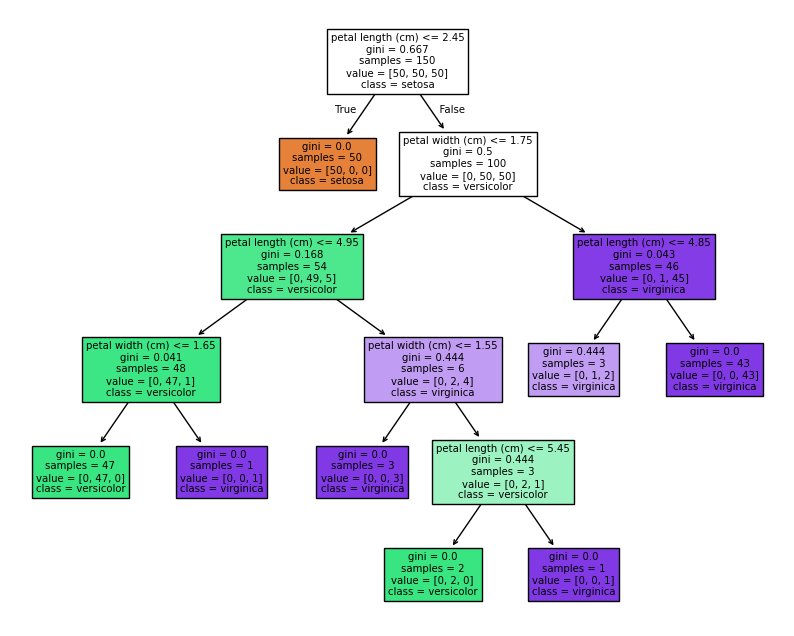

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
plot_tree(tree, feature_names=X.columns,class_names=iris.target_names, filled=True)
plt.show()

In [7]:
# tre 학습 후 가장 중요한 피처들의 정보 출력
tree.feature_importances_ , tree.feature_names_in_

(array([0.57167834, 0.42832166]),
 array(['petal length (cm)', 'petal width (cm)'], dtype=object))

In [9]:
tree.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
y.to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

c:\python_src\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


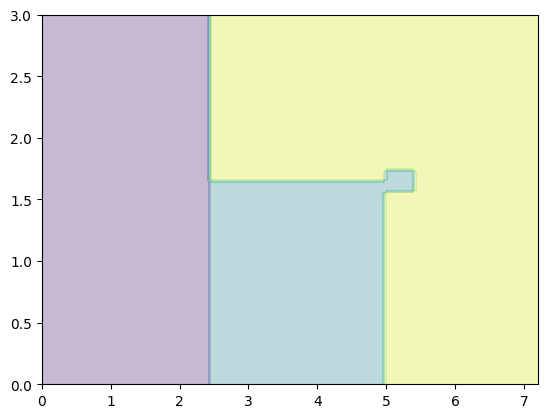

In [ ]:
# 전체 영역에 대한 예측 - 시각화
import numpy as np
lengths, widths = np.meshgrid(np.linspace(0,7.2,100), np.linspace(0,3,100))
x_iris_all = np.c_[lengths.ravel(), widths.ravel()] #2차원 -> 1차원

y_pred = tree.predict(x_iris_all).reshape(lengths.shape)
plt.contourf(lengths,widths,y_pred,alpha=0.3)

In [17]:
lengths.shape

(100, 100)

## ***모델링

In [31]:
# 성능측정을 위한 데이터 분할
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
iris = load_iris()

X = iris.data
y = iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y, test_size=0.2, random_state=42)

# 학습
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

y_hat = tree.predict(X_test)

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [28]:
tree.score(X_test,y_test)

0.9666666666666667

#### 하이퍼파라미터 조정
- grid search

In [34]:
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()
param_grid = {
    'criterion' : ['gini','entropy','log_loss'],
    'max_depth' : range(1,10)
}


grid_searchcv = GridSearchCV(tree, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)

grid_searchcv.fit(X_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': range(1, 10)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [36]:
print(grid_searchcv.best_params_)
print(grid_searchcv.best_score_)
grid_searchcv.best_estimator_

{'criterion': 'gini', 'max_depth': 4}
0.9666666666666667


,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None
